# <span style = 'color:#4584B6'> NATURAL LANGUAGE PROCESSING : Comparative Analysis of Language Usage in the Top 100 Forked GitHub Repositories
## <span style= 'color: #5097A4'>EXPLORATION NOTEBOOK
* By Annie Carter for Science of the Fork Organization
* Source: GitHub 

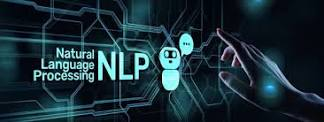

In [80]:
# Transformation 
import pandas as pd
import numpy as np
import os
import json
import warnings
warnings.filterwarnings("ignore")

#My imports 
import wrangle as w
from env import github_token, github_username
import acquire as a 
import prepare as p


#NLP Acquire and Preparation Techniques
from typing import Dict, List, Optional, Union, cast
import requests
from bs4 import BeautifulSoup
from time import sleep
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#NLP Explore
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer


# Exploring
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr
from scipy.stats import chi2_contingency


# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns


#NLP Modeling 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score




![image](https://github.com/Science-of-the-Fork/nlp-project/assets/131205837/3c286317-2826-45ad-bfb6-8c9ec3a8679f)



## <span style ='color:#4584B6'> AQCUIRE 

In [4]:
python_df = a.get_github_python_data()
python_df

,repo_name,url,language,readme_content
0,public-apis/public-apis,https://github.com/public-apis/public-apis/blo...,Python,Public APIs A collective list of free A...
1,ultralytics/yolov5,https://github.com/ultralytics/yolov5/blob/mas...,Python,English | 简体中文 ...
2,josephmisiti/awesome-machine-learning,https://github.com/josephmisiti/awesome-machin...,Python,Awesome Machine Learning A curated list of aw...
3,bregman-arie/devops-exercises,https://github.com/bregman-arie/devops-exercis...,Python,DevOps 面试问题ℹ️ 本仓库包含各种 DevOps 相关主题的面试问题📊 当前有 ...
4,scrapy/scrapy,https://github.com/scrapy/scrapy/blob/master/R...,Python,ScrapyOverviewScrapy is a fast high-level web ...
...,...,...,...,...
85,public-apis/public-apis,https://github.com/public-apis/public-apis/blo...,Python,Public APIs A collective list of free A...
86,home-assistant/core,https://github.com/home-assistant/core/blob/de...,Python,Home Assistant Open source home automation tha...
87,vinta/awesome-python,https://github.com/vinta/awesome-python/blob/m...,Python,Awesome Python A curated list of awesome Pytho...
88,ansible/ansible,https://github.com/ansible/ansible/blob/devel/...,Python,AnsibleAnsible is a radically simple IT automa...


In [5]:
js_df = a.get_github_java_script_data()
js_df

,repo_name,url,language,readme_content
0,twbs/bootstrap,https://github.com/twbs/bootstrap/blob/main/RE...,JavaScript,"Bootstrap Sleek, intuitive, and power..."
1,nightscout/cgm-remote-monitor,https://github.com/nightscout/cgm-remote-monit...,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...
2,github/docs,https://github.com/github/docs/blob/main/READM...,JavaScript,GitHub Docs This repository contains the docum...
3,facebook/react,https://github.com/facebook/react/blob/main/RE...,JavaScript,React · React is a JavaScript library for b...
4,mrdoob/three.js,https://github.com/mrdoob/three.js/blob/dev/RE...,JavaScript,three.jsJavaScript 3D libraryThe aim of the pr...
...,...,...,...,...
84,modood/Administrative-divisions-of-China,https://github.com/modood/Administrative-divis...,JavaScript,Administrative-divisions-of-China中华人民共和国行政区划（五...
85,learn-co-students/javascript-intro-to-function...,https://github.com/learn-co-students/javascrip...,JavaScript,JavaScript Intro to Functions LabObjectivesPra...
86,learn-co-curriculum/phase-0-intro-to-js-2-obje...,https://github.com/learn-co-curriculum/phase-0...,JavaScript,Objects LabLearning GoalsCreate an ObjectPerfo...
87,strapi/strapi,https://github.com/strapi/strapi/blob/main/REA...,JavaScript,"API creation made simple, secu..."


In [6]:
language_df = pd.concat([python_df, js_df], axis=0)
language_df['title'], language_df['original'] = language_df['repo_name'], language_df['readme_content']
language_df.to_csv('language_df.csv', index=False)

In [7]:
language_df.head(2)

,repo_name,url,language,readme_content,title,original
0,public-apis/public-apis,https://github.com/public-apis/public-apis/blo...,Python,Public APIs A collective list of free A...,public-apis/public-apis,Public APIs A collective list of free A...
1,ultralytics/yolov5,https://github.com/ultralytics/yolov5/blob/mas...,Python,English | 简体中文 ...,ultralytics/yolov5,English | 简体中文 ...


## PREPARE

In [8]:
import re
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re
import unicodedata
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def nlp_clean(text, extra_words=None, exclude_words=None):
    ''' This function does a basic clean Lowercased Tokenized Text with Latin Characters Only
    call to add cleaned column from readme_content'''
    # Basic clean
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    text = re.sub(r'[^a-zA-Z0-9\s\']', '', text)
    
    # Tokenize
    filtered_text = text.split()
    
    return filtered_text

# Then the nlp_clean function to create a new column 'cleaned'
language_df['cleaned'] = language_df['readme_content'].apply(nlp_clean)




In [9]:
language_df.head(2)

,repo_name,url,language,readme_content,title,original,cleaned
0,public-apis/public-apis,https://github.com/public-apis/public-apis/blo...,Python,Public APIs A collective list of free A...,public-apis/public-apis,Public APIs A collective list of free A...,"[public, apis, a, collective, list, of, free, ..."
1,ultralytics/yolov5,https://github.com/ultralytics/yolov5/blob/mas...,Python,English | 简体中文 ...,ultralytics/yolov5,English | 简体中文 ...,"[english, yolov5, is, the, world's, most, love..."


In [10]:
def lemmatize_text(text, extra_words=None, exclude_words=None):
    '''This function cleans, tokenizes, lemmatizes, and removes stop words. 
    Call to add 'lemmatized' column from 'original' column'''
    
    # Basic clean
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    text = re.sub(r'[^a-zA-Z0-9\s\']', '', text)
    
    # Tokenize
    words = text.split()
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    if extra_words:
        stop_words.update(extra_words)
    if exclude_words:
        stop_words.difference_update(exclude_words)
    filtered_words = [word for word in lemmatized_words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    
    return filtered_text

# Example usage on a DataFrame's "readme_content" column
language_df['lemmatized'] = language_df['original'].apply(lemmatize_text)


In [11]:
language_df.head(3).T

,0,1,2
repo_name,public-apis/public-apis,ultralytics/yolov5,josephmisiti/awesome-machine-learning
url,https://github.com/public-apis/public-apis/blo...,https://github.com/ultralytics/yolov5/blob/mas...,https://github.com/josephmisiti/awesome-machin...
language,Python,Python,Python
readme_content,Public APIs A collective list of free A...,English | 简体中文 ...,Awesome Machine Learning A curated list of aw...
title,public-apis/public-apis,ultralytics/yolov5,josephmisiti/awesome-machine-learning
original,Public APIs A collective list of free A...,English | 简体中文 ...,Awesome Machine Learning A curated list of aw...
cleaned,"[public, apis, a, collective, list, of, free, ...","[english, yolov5, is, the, world's, most, love...","[awesome, machine, learning, a, curated, list,..."
lemmatized,public apis collective list free apis use soft...,english yolov5 world's loved vision ai represe...,awesome machine learning curated list awesome ...


In [12]:
def prep_process_csv(language_df):
    '''This function drops unneeded columns and creates a csv for processed language_to explore
        with based on ReadMe'''
    columns_to_drop = ['url', 'readme_content', 'repo_name']
    language_df.drop(columns=columns_to_drop, inplace=True)
    
    # Save the modified DataFrame to a new CSV file
    language_df.to_csv('processed_language_df.csv', index=False)
prep_process_csv(language_df)

In [13]:
language_df.head(3).T

,0,1,2
language,Python,Python,Python
title,public-apis/public-apis,ultralytics/yolov5,josephmisiti/awesome-machine-learning
original,Public APIs A collective list of free A...,English | 简体中文 ...,Awesome Machine Learning A curated list of aw...
cleaned,"[public, apis, a, collective, list, of, free, ...","[english, yolov5, is, the, world's, most, love...","[awesome, machine, learning, a, curated, list,..."
lemmatized,public apis collective list free apis use soft...,english yolov5 world's loved vision ai represe...,awesome machine learning curated list awesome ...


## INTIAL EXPLORATION ON ALL WORDS

In [14]:
# Calculate the length of text in each row for different columns
language_df['original_length'] = language_df['original'].apply(len)
language_df['cleaned_length'] = language_df['cleaned'].apply(len)
language_df['lemmatized_length'] = language_df['lemmatized'].apply(len)

# Calculate the total length of all words for each column
total_original_length = language_df['original_length'].sum()
total_cleaned_length = language_df['cleaned_length'].sum()
total_lemmatized_length = language_df['lemmatized_length'].sum()

print(f"Total length of words in 'original' column: {total_original_length}")
print(f"Total length of words in 'cleaned' column: {total_cleaned_length}")
print(f"Total length of words in 'lemmatized' column: {total_lemmatized_length}")



Total length of words in 'original' column: 3037886
Total length of words in 'cleaned' column: 325709
Total length of words in 'lemmatized' column: 2317881


In [15]:
language_df.head().T

,0,1,2,3,4
language,Python,Python,Python,Python,Python
title,public-apis/public-apis,ultralytics/yolov5,josephmisiti/awesome-machine-learning,bregman-arie/devops-exercises,scrapy/scrapy
original,Public APIs A collective list of free A...,English | 简体中文 ...,Awesome Machine Learning A curated list of aw...,DevOps 面试问题ℹ️ 本仓库包含各种 DevOps 相关主题的面试问题📊 当前有 ...,ScrapyOverviewScrapy is a fast high-level web ...
cleaned,"[public, apis, a, collective, list, of, free, ...","[english, yolov5, is, the, world's, most, love...","[awesome, machine, learning, a, curated, list,...","[devops, i, devops, 413, devops, devops, pr, d...","[scrapyoverviewscrapy, is, a, fast, highlevel,..."
lemmatized,public apis collective list free apis use soft...,english yolov5 world's loved vision ai represe...,awesome machine learning curated list awesome ...,devops devops 413 devops devops pr devops jenk...,scrapyoverviewscrapy fast highlevel web crawli...
original_length,102927,14140,123293,26658,1339
cleaned_length,9378,1430,15065,1214,146
lemmatized_length,91950,10489,101606,10047,1045


# <b>________________________________________________________________________________________________________________</b>

In [16]:
# Split each set of words by spaces, turn into a list, and calculate value counts
original_freq = language_df['original'].str.split().explode().value_counts()
cleaned_freq = language_df['cleaned'].explode().value_counts()
lemmatized_freq = language_df['lemmatized'].str.split().explode().value_counts()
print(f"Word Frequency Counts:\n{'-'*30}")
print(f"Original Column:\n{original_freq.head()}\n{'-'*30}")
print(f"Cleaned Column:\n{cleaned_freq.head()}\n{'-'*30}")
print(f"Lemmatized Column:\n{lemmatized_freq.head()}\n{'-'*30}")

Word Frequency Counts:
------------------------------
Original Column:
and    11503
-       9069
the     8003
for     7848
to      6939
Name: original, dtype: int64
------------------------------
Cleaned Column:
and    11576
the     8776
for     8031
to      7046
a       6509
Name: cleaned, dtype: int64
------------------------------
Lemmatized Column:
data        2641
learning    2045
machine     1806
library     1664
python      1612
Name: lemmatized, dtype: int64
------------------------------


In [17]:
all_words = pd.concat([original_freq, cleaned_freq, lemmatized_freq], axis=1).fillna(0).astype(int)
all_words

,original,cleaned,lemmatized
and,11503,11576,0
-,9069,0,0
the,8003,8776,0
for,7848,8031,0
to,6939,7046,0
...,...,...,...
coin,0,0,1
trick,0,0,1
penny,0,0,1
revision,0,0,1


In [18]:
all_words.sort_values(['lemmatized', 'cleaned', 'original'], ascending=False)


,original,cleaned,lemmatized
data,1713,2641,2641
learning,1261,2045,2045
machine,1005,1747,1806
library,1253,1534,1664
python,159,1612,1612
...,...,...,...
block),1,0,0
واستخدام,1,0,0
highlight.js,1,0,0
page.Images,1,0,0


In [19]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

<Axes: >

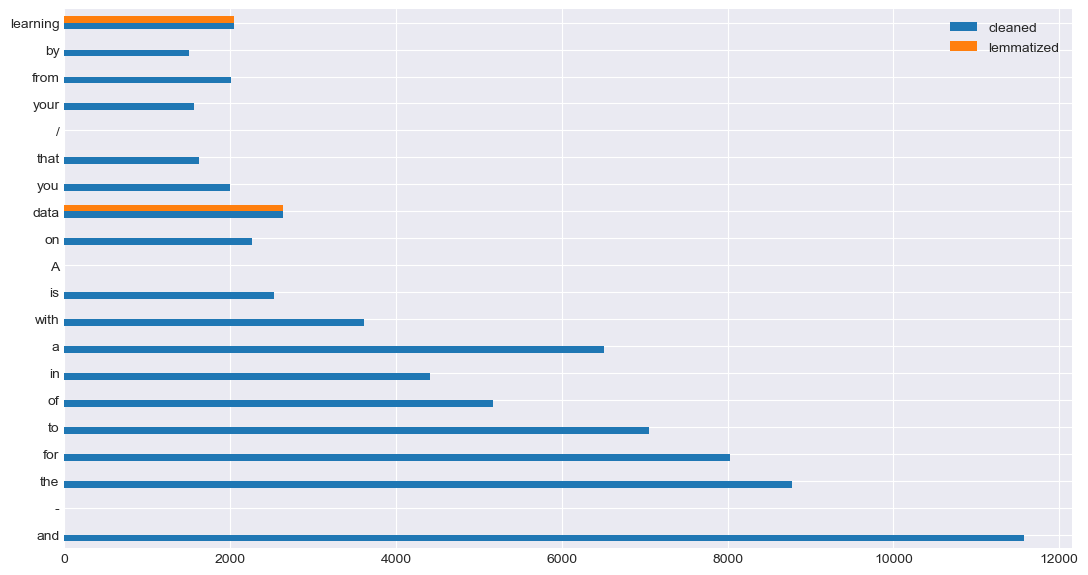

In [20]:
all_words.sort_values('original', ascending=False)[['cleaned', 'lemmatized']].head(20).plot.barh()


In [21]:
all_words.sort_values('original', ascending=False).head(20)\
.apply(lambda row: row/row['original'], axis=1)

,original,cleaned,lemmatized
and,1.0,1.006346,0.000000
-,1.0,0.000000,0.000000
the,1.0,1.096589,0.000000
for,1.0,1.023318,0.000000
to,1.0,1.015420,0.000000
of,1.0,1.005843,0.000000
in,1.0,1.044003,0.000000
a,1.0,1.591832,0.000000
with,1.0,1.022637,0.000000
is,1.0,1.012841,0.000000


## <span style = 'color: #48AAAD'>Initial questions <>

1. **Between JavaScript and Python, which language exhibits greater prevalence within the content of the READMEs?**
   
2. **In a compilation of the top 100 most Forked GitHub repositories, what are the five words that demonstrate the highest frequency of occurrence?**
   
3. **Within JavaScript code segments, which bigrams, or sequential pairs of words, are commonly encountered?**
   
4. **In the context of Python code segments, which particular bigrams, or consecutive pairs of words, emerge as prominent occurrences?**
   
5. **Within JavaScript code samples, what are the frequently occurring trigrams, or sequences of three words?**
   
6. **In Python code excerpts, what trigrams, or sets of three consecutive words, stand out as prominent linguistic patterns?**


# VISAUL EXPLORATION FOR Q1-Q6 & HYPOTHESIS TESTING

## **Q2 . In a compilation of the top 100 most Forked GitHub repositories, what are the five words that demonstrate the highest frequency of occurrence?**

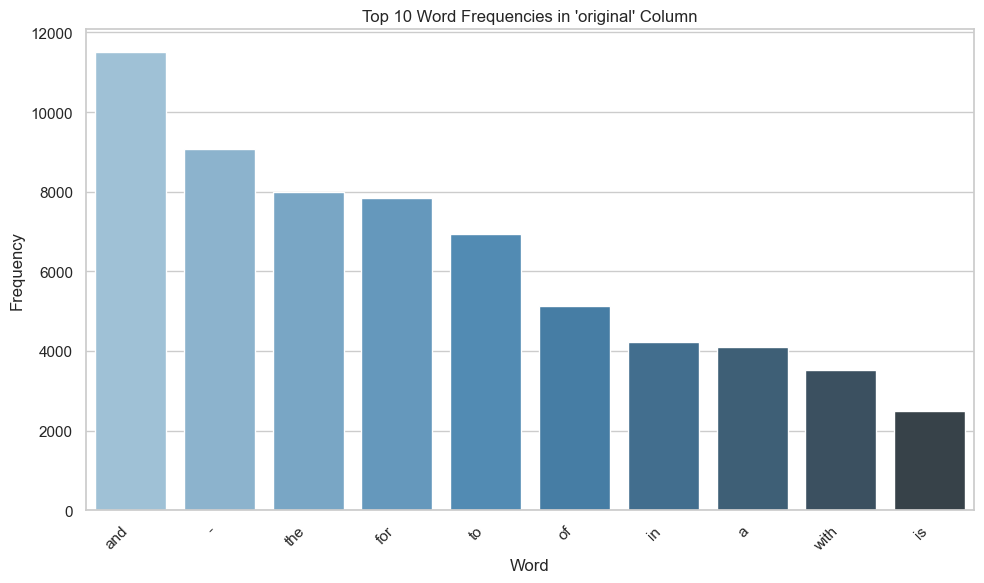

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for word frequencies
word_freq_df = pd.DataFrame({
    'Word': original_words.index,
    'Frequency': original_words.values
})

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Create a countplot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=word_freq_df.head(10), x='Word', y='Frequency', palette="Blues_d")
plt.title("Top 10 Word Frequencies in 'original' Column")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


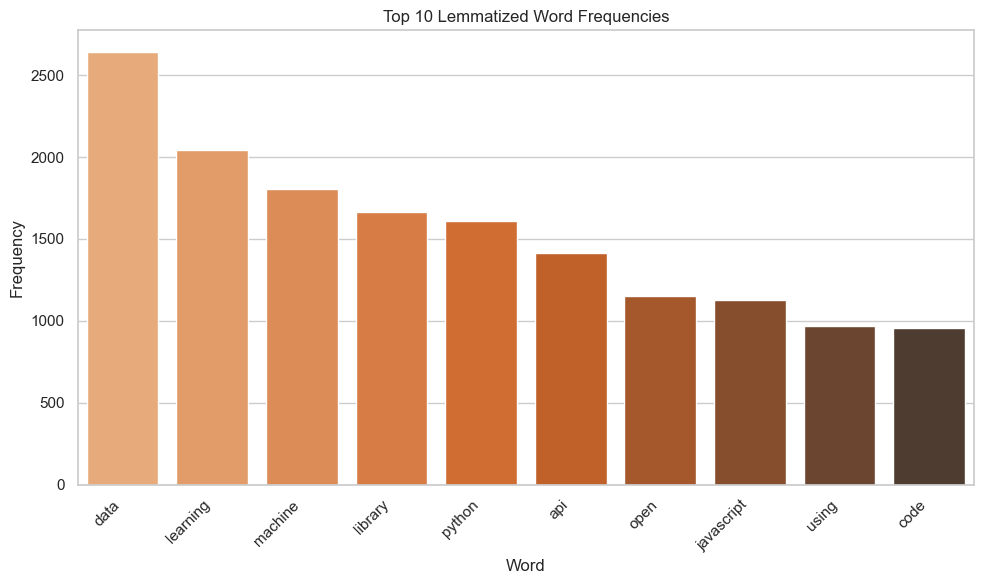

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for lemmatized word frequencies
lemmatized_word_freq_df = pd.DataFrame({
    'Word': lemmatized_words.index,
    'Frequency': lemmatized_words.values
})

# Sort the DataFrame by frequency in descending order
lemmatized_word_freq_df = lemmatized_word_freq_df.sort_values(by='Frequency', ascending=False)

# Create a countplot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=lemmatized_word_freq_df.head(10), x='Word', y='Frequency', palette="Oranges_d")
plt.title("Top 10 Lemmatized Word Frequencies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


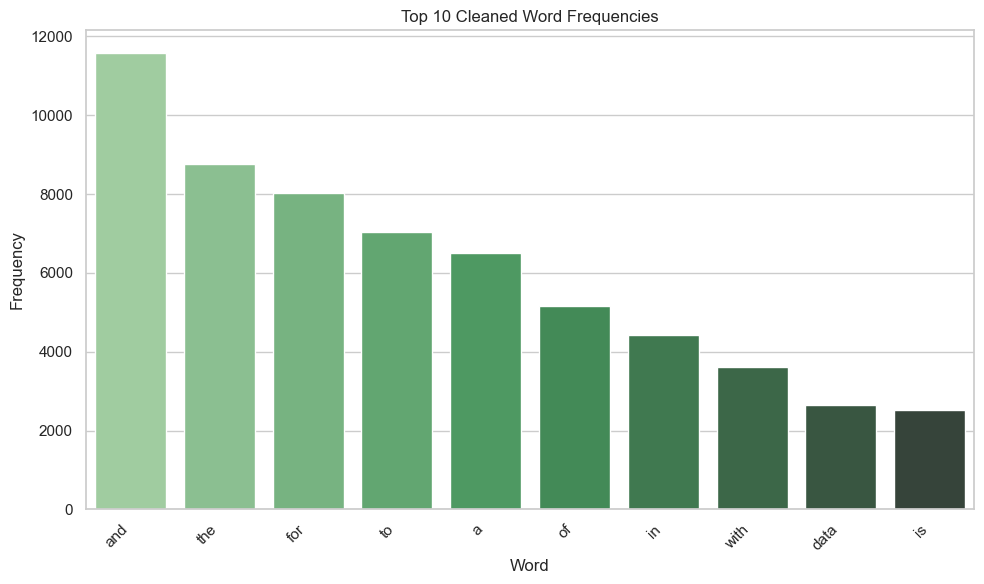

In [25]:
# Create a DataFrame for cleaned word frequencies
cleaned_word_freq_df = pd.DataFrame({
    'Word': cleaned_words.index,
    'Frequency': cleaned_words.values
})

# Sort the DataFrame by frequency in descending order
cleaned_word_freq_df = cleaned_word_freq_df.sort_values(by='Frequency', ascending=False)

# Create a countplot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=cleaned_word_freq_df.head(10), x='Word', y='Frequency', palette="Greens_d")
plt.title("Top 10 Cleaned Word Frequencies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


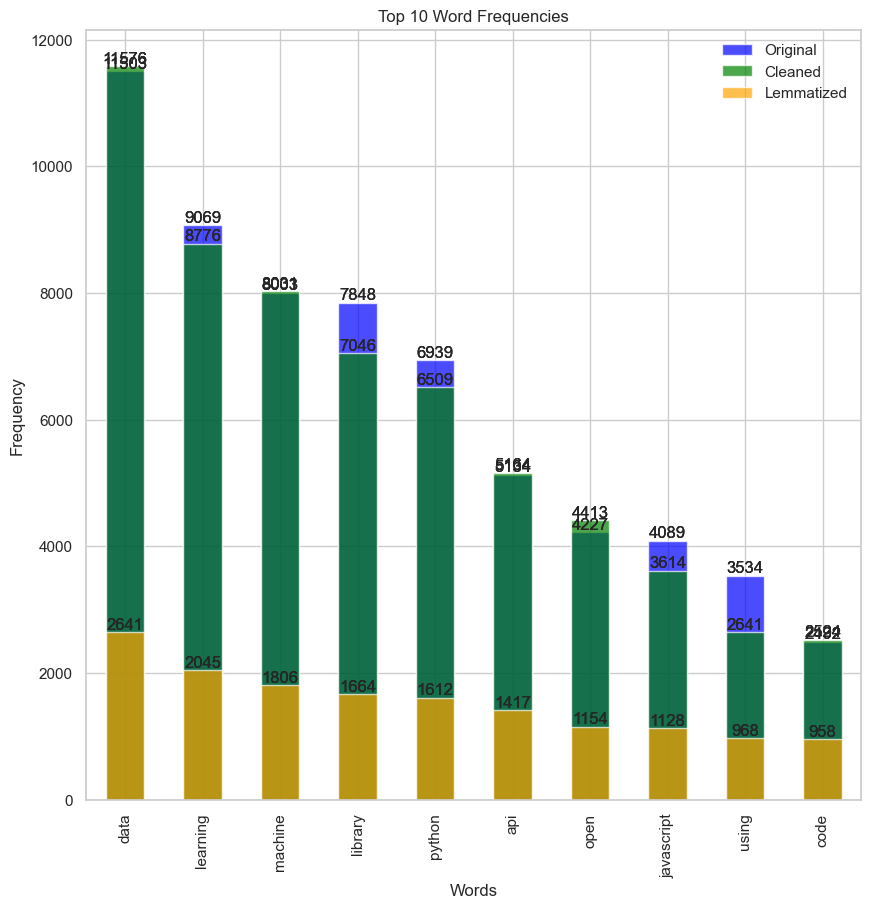

In [38]:
# Split each set of words by spaces, turn into a list, and calculate value counts
original_words = language_df['original'].str.split().explode().value_counts()
cleaned_words = language_df['cleaned'].explode().value_counts()
lemmatized_words = language_df['lemmatized'].str.split().explode().value_counts()

# Plotting
plt.figure(figsize=(10, 10))

original_plot = original_words[:10].plot(kind='bar', color='blue', alpha=0.7, label='Original')
cleaned_plot = cleaned_words[:10].plot(kind='bar', color='green', alpha=0.7, label='Cleaned')
lemmatized_plot = lemmatized_words[:10].plot(kind='bar', color='orange', alpha=0.7, label='Lemmatized')

# Annotate bars with their counts
for p in original_plot.patches:
    original_plot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

for p in cleaned_plot.patches:
    cleaned_plot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

for p in lemmatized_plot.patches:
    lemmatized_plot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title("Top 10 Word Frequencies")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.legend()

plt.show()


### FIndings: Top 100 most Forked GitHub repositories, what are the five (10) words that demonstrate the highest frequency of occurrencFindings: top 10 words
1. data
2. learning
3. machine
4. library
5. python
6. api
7. open
8. javascript
9. using
10. code

## **Q1. Between JavaScript and Python, which language exhibits greater prevalence within the content of the READMEs?**
   

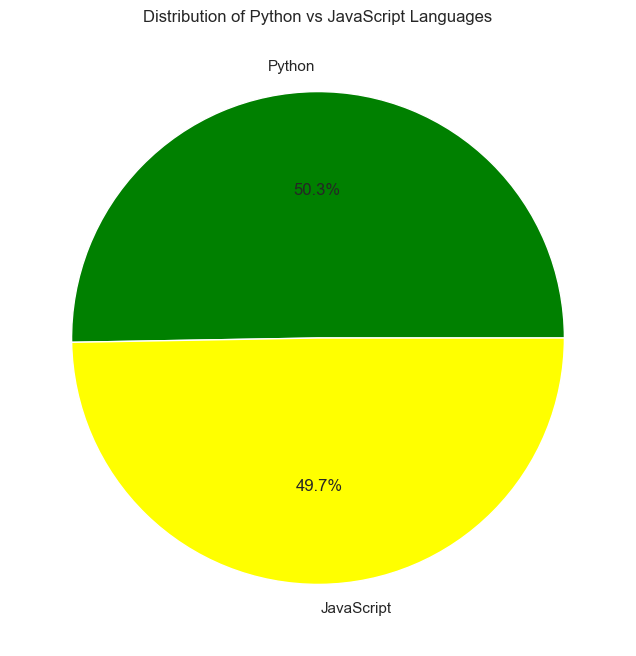

In [39]:
# Calculate the value counts for each language
language_counts = language_df['language'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', colors=['green', 'yellow'])
plt.title('Distribution of Python vs JavaScript Languages')
plt.show()

### Findings Equal Distribution no prevalent of one vs other. * Could be the way we scraped the data need to readdress

In [36]:
# Split each set of words by spaces, turn into a list, and calculate value counts
Py_words_original = language_df[language_df['language'] == 'Python']['original'].str.split().explode().value_counts()
Py_words_cleaned = language_df[language_df['language'] == 'Python']['cleaned'].str.split().explode().value_counts()
Py_words_lemmatized = language_df[language_df['language'] == 'Python']['lemmatized'].str.split().explode().value_counts()

print(f"Word Frequency Counts for Python Language:\n{'-'*30}")
print(f"Original Column:\n{Py_words_original.head()}\n{'-'*30}")
print(f"Cleaned Column:\n{Py_words_cleaned.head()}\n{'-'*30}")
print(f"Lemmatized Column:\n{Py_words_lemmatized.head()}\n{'-'*30}")


Word Frequency Counts for Python Language:
------------------------------
Original Column:
and    9340
-      8387
for    6861
to     4030
the    3988
Name: original, dtype: int64
------------------------------
Cleaned Column:
Series([], Name: cleaned, dtype: int64)
------------------------------
Lemmatized Column:
data        2423
learning    2017
machine     1776
python      1606
library     1602
Name: lemmatized, dtype: int64
------------------------------


In [37]:
# Split each set of words by spaces, turn into a list, and calculate value counts
js_words_original = language_df[language_df['language'] == 'JavaScript']['original'].str.split().explode().value_counts()
js_words_cleaned = language_df[language_df['language'] == 'JavaScript']['cleaned'].str.split().explode().value_counts()
js_words_lemmatized = language_df[language_df['language'] == 'JavaScript']['lemmatized'].str.split().explode().value_counts()

print(f"Word Frequency Counts for JavaScript Language:\n{'-'*30}")
print(f"Original Column:\n{js_words_original.head()}\n{'-'*30}")
print(f"Cleaned Column:\n{js_words_cleaned.head()}\n{'-'*30}")
print(f"Lemmatized Column:\n{js_words_lemmatized.head()}\n{'-'*30}")


Word Frequency Counts for JavaScript Language:
------------------------------
Original Column:
the    4015
to     2909
and    2163
a      1623
in     1549
Name: original, dtype: int64
------------------------------
Cleaned Column:
Series([], Name: cleaned, dtype: int64)
------------------------------
Lemmatized Column:
javascript    948
function      442
use           426
code          362
file          308
Name: lemmatized, dtype: int64
------------------------------


###  Q1 Visual PYTHON VS JAVASCRIPT WORD CLOUDS

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Split each set of words by spaces, turn into a list, and calculate value counts
Py_words_original = language_df[language_df['language'] == 'Python']['original'].str.split().explode().value_counts()
Py_words_cleaned = language_df[language_df['language'] == 'Python']['cleaned'].explode().value_counts()
Py_words_lemmatized = language_df[language_df['language'] == 'Python']['lemmatized'].str.split().explode().value_counts()

Js_words_original = language_df[language_df['language'] == 'JavaScript']['original'].str.split().explode().value_counts()
Js_words_cleaned = language_df[language_df['language'] == 'JavaScript']['cleaned'].explode().value_counts()
Js_words_lemmatized = language_df[language_df['language'] == 'JavaScript']['lemmatized'].str.split().explode().value_counts()

# Function to generate word cloud
def generate_word_cloud(words, title):
    wordcloud = WordCloud(background_color='white').generate(' '.join(words))
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

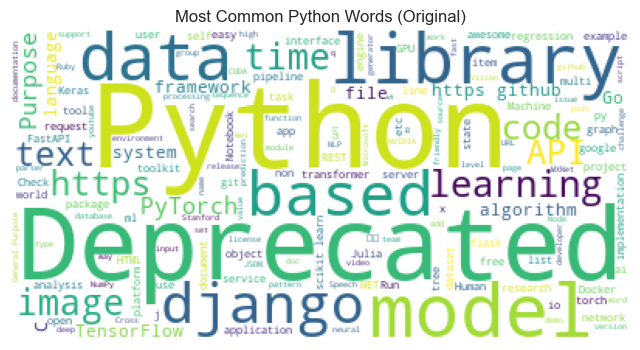

In [41]:
# Generate word clouds for Python Original
generate_word_cloud(Py_words_original.index, 'Most Common Python Words (Original)')

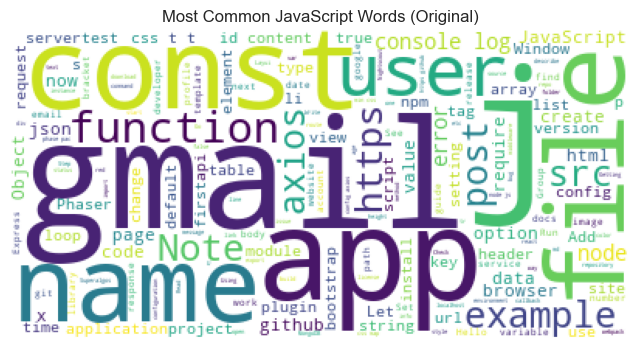

In [42]:
# Generate word clouds for JavaScript Original
generate_word_cloud(Js_words_original.index, 'Most Common JavaScript Words (Original)')

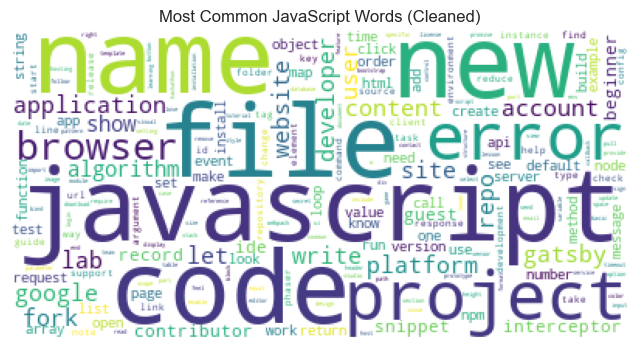

In [43]:
# Generate word clouds for JavaScript Cleaned
generate_word_cloud(Js_words_cleaned.index, 'Most Common JavaScript Words (Cleaned)')

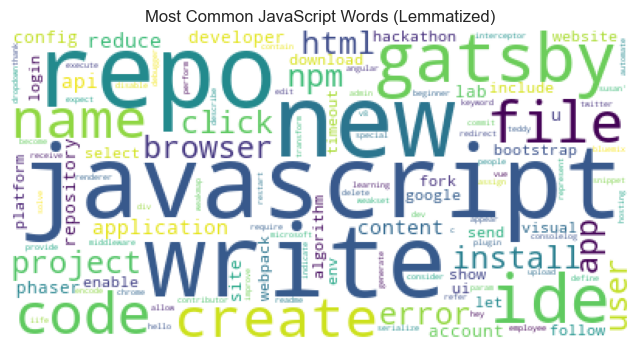

In [44]:
# Generate word clouds for JavaScript Lemmatized
generate_word_cloud(Js_words_lemmatized.index, 'Most Common JavaScript Words (Lemmatized)')

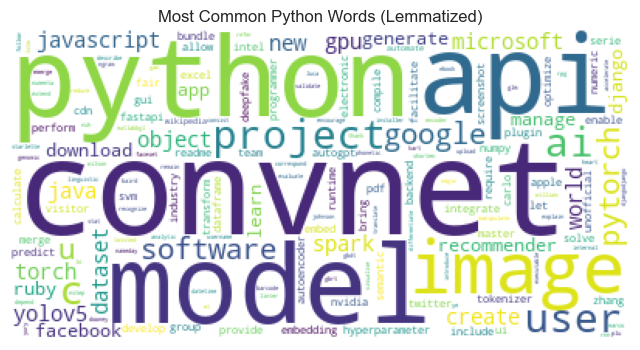

In [45]:
# Generate word clouds for Python Lemmatized
generate_word_cloud(Py_words_lemmatized.index, 'Most Common Python Words (Lemmatized)')

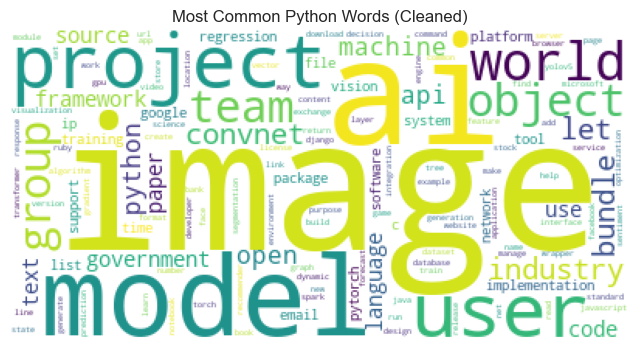

In [46]:
# Generate word clouds for Python Cleaned
generate_word_cloud(Py_words_cleaned.index, 'Most Common Python Words (Cleaned)')

### Q1 PYTHON VS JAVASCRIPT BAR PLOTS

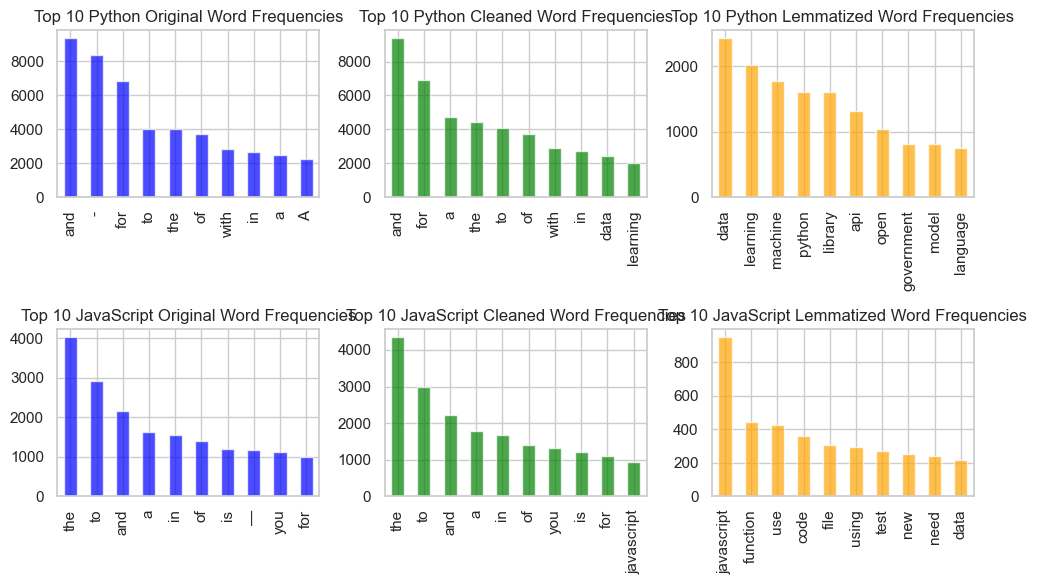

In [47]:
import matplotlib.pyplot as plt

# Split each set of words by spaces, turn into a list, and calculate value counts
Py_words_original = language_df[language_df['language'] == 'Python']['original'].str.split().explode().value_counts()
Py_words_cleaned = language_df[language_df['language'] == 'Python']['cleaned'].explode().value_counts()
Py_words_lemmatized = language_df[language_df['language'] == 'Python']['lemmatized'].str.split().explode().value_counts()

Js_words_original = language_df[language_df['language'] == 'JavaScript']['original'].str.split().explode().value_counts()
Js_words_cleaned = language_df[language_df['language'] == 'JavaScript']['cleaned'].explode().value_counts()
Js_words_lemmatized = language_df[language_df['language'] == 'JavaScript']['lemmatized'].str.split().explode().value_counts()

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
Py_words_original[:10].plot(kind='bar', color='blue', alpha=0.7)
plt.title("Top 10 Python Original Word Frequencies")

plt.subplot(2, 3, 2)
Py_words_cleaned[:10].plot(kind='bar', color='green', alpha=0.7)
plt.title("Top 10 Python Cleaned Word Frequencies")

plt.subplot(2, 3, 3)
Py_words_lemmatized[:10].plot(kind='bar', color='orange', alpha=0.7)
plt.title("Top 10 Python Lemmatized Word Frequencies")

plt.subplot(2, 3, 4)
Js_words_original[:10].plot(kind='bar', color='blue', alpha=0.7)
plt.title("Top 10 JavaScript Original Word Frequencies")

plt.subplot(2, 3, 5)
Js_words_cleaned[:10].plot(kind='bar', color='green', alpha=0.7)
plt.title("Top 10 JavaScript Cleaned Word Frequencies")

plt.subplot(2, 3, 6)
Js_words_lemmatized[:10].plot(kind='bar', color='orange', alpha=0.7)
plt.title("Top 10 JavaScript Lemmatized Word Frequencies")

plt.tight_layout()
plt.show()


### Hypothesis 1 - Chi-squared test of independence to determine if the distribution of programming languages (JavaScript, Python) significantly differs within the READMEs.

In [48]:
alpha = 0.05

# Create a contingency table with the counts of Python and JavaScript languages
language_table = pd.crosstab(language_df['language'], columns='count')

# Perform the Chi-squared test of independence
chi2, p_value, dof, expected = chi2_contingency(language_table)

# Print the results
print(f"Chi-squared value: {chi2}")
print(f'p_value = {p_value:.4f}')
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
print('\n----')
print(f'p_value = {p_value:.4f}')
print(f'The p-value is less than the alpha: {p_value < alpha}')
if p_value < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")


Chi-squared value: 0.0
p_value = 1.0000
Degrees of freedom: 0
Expected frequencies:
[[89.]
 [90.]]

----
p_value = 1.0000
The p-value is less than the alpha: False
we fail to reject the null


## Q3 PYTHON BIGRAMS

In [49]:
# Calculate word frequency counts for the Python language

# Original column
Py_original = language_df[language_df['language'] == 'Python']['original'].str.split().explode()

# Cleaned column
Py_cleaned = language_df[language_df['language'] == 'Python']['cleaned'].explode()

# Lemmatized column
Py_lemmatized = language_df[language_df['language'] == 'Python']['lemmatized'].str.split().explode()

print(f"Word Frequency Counts for Python Language:\n{'-'*30}")
print(f"Original Column:\n{Py_original.head()}\n{'-'*30}")
print(f"Cleaned Column:\n{Py_cleaned.head()}\n{'-'*30}")
print(f"Lemmatized Column:\n{Py_lemmatized.head()}\n{'-'*30}")


Word Frequency Counts for Python Language:
------------------------------
Original Column:
0        Public
0          APIs
0             A
0    collective
0          list
Name: original, dtype: object
------------------------------
Cleaned Column:
0        public
0          apis
0             a
0    collective
0          list
Name: cleaned, dtype: object
------------------------------
Lemmatized Column:
0        public
0          apis
0    collective
0          list
0          free
Name: lemmatized, dtype: object
------------------------------


In [50]:
top_20_python_bigrams = (pd.Series(nltk.ngrams(Py_lemmatized, 2))
                      .value_counts()
                      .head(20))

top_20_python_bigrams.head()

(machine, learning)    1254
(neural, network)       477
(released, paper)       386
(government, open)      368
(deep, learning)        322
dtype: int64

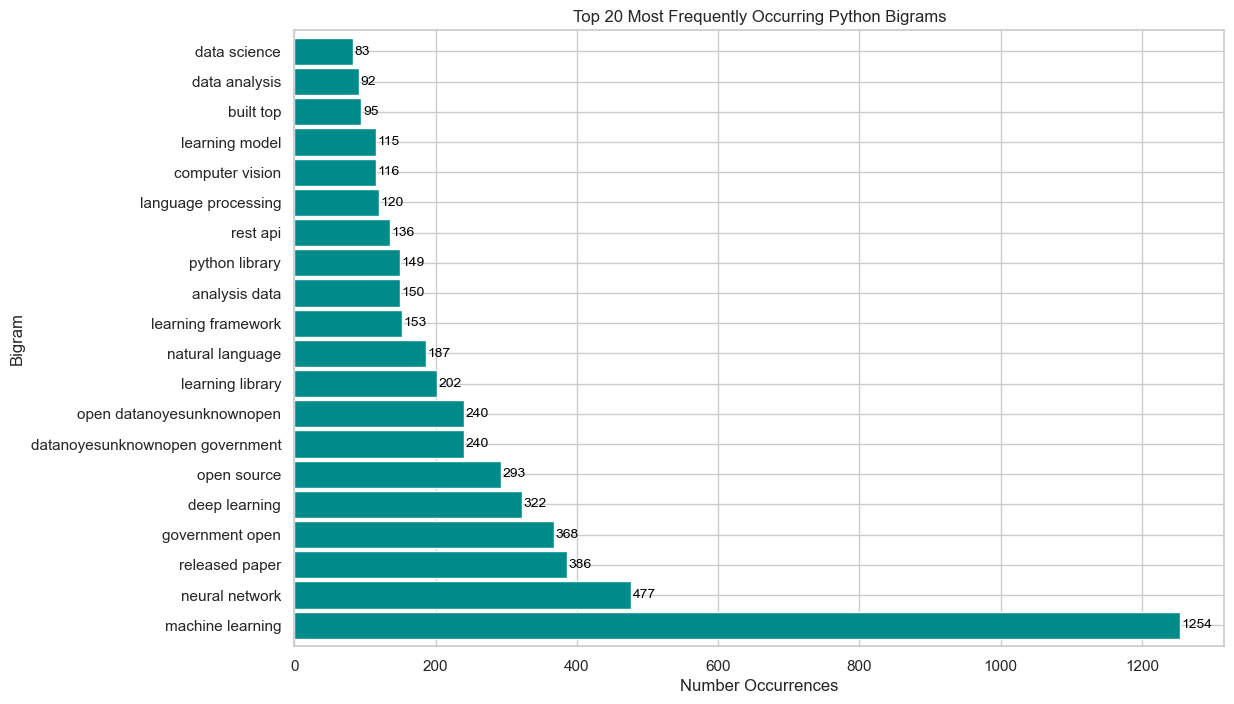

In [51]:
# Sort the bigrams in descending order by frequency
top_20_python_bigrams = top_20_python_bigrams.sort_values(ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
bars = top_20_python_bigrams.plot(kind='barh', color = '#008B8B', width=0.9)

# Add count annotations at the end of the bars
for bar in bars.patches:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height() / 2, 
             f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=10, color='black')

plt.title('Top 20 Most Frequently Occurring Python Bigrams')
plt.xlabel('Number Occurrences')
plt.ylabel('Bigram')

# Make the labels pretty
ticks, labels = plt.yticks()
new_labels = [f'{bigram[0]} {bigram[1]}' for bigram in top_20_python_bigrams.index]
plt.yticks(ticks, new_labels)

plt.show()

## **Q4. In the context of Python code segments, which particular trigrams, or consecutive pairs of words, emerge as prominent occurrences?**

In [52]:
top_20_python_trigrams = (pd.Series(nltk.ngrams(Py_lemmatized, 3))
                      .value_counts()
                      .head(20))

top_20_python_trigrams.head()

(open, datanoyesunknownopen, government)    240
(government, open, datanoyesunknownopen)    232
(machine, learning, library)                165
(machine, learning, model)                  113
(natural, language, processing)              87
dtype: int64

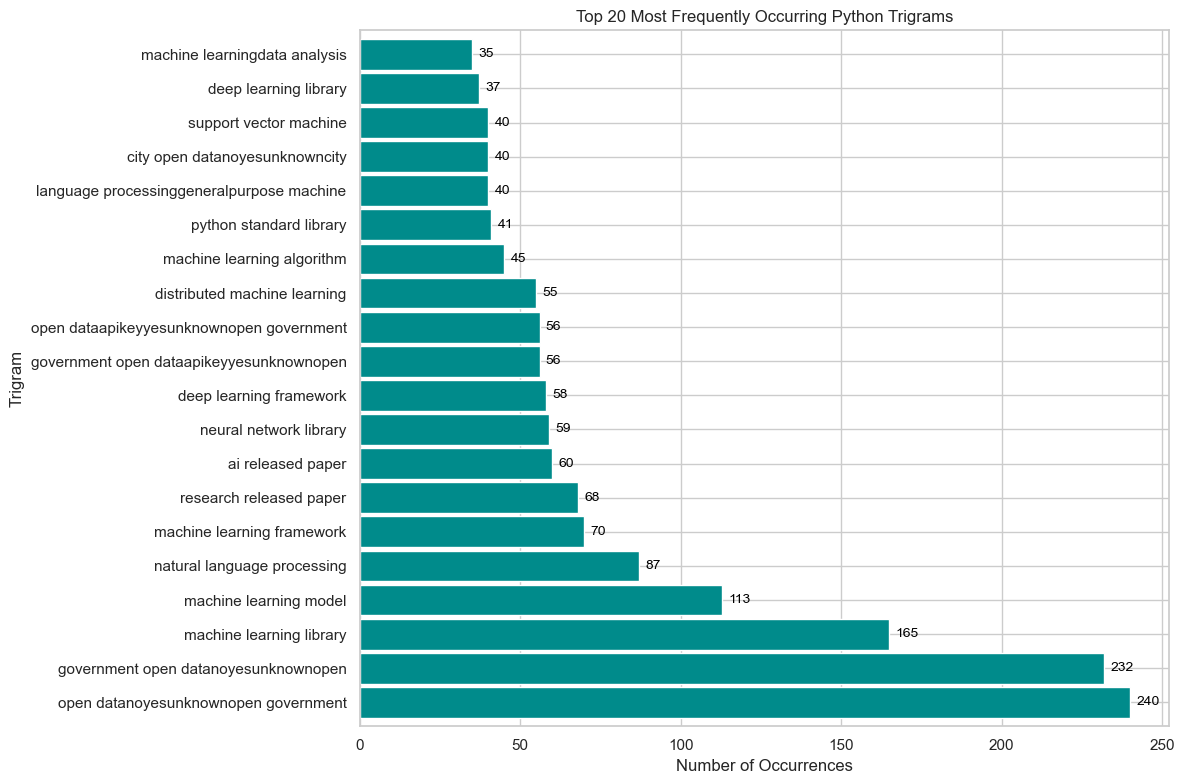

In [53]:
# Sort the Trigram in descending order by frequency
top_20_python_trigrams = top_20_python_trigrams.sort_values(ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
bars = top_20_python_trigrams.plot(kind='barh', color='#008B8B', width=0.9)

# Add count annotations at the end of the bars
for bar in bars.patches:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height() / 2, 
             f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=10, color='black')

plt.title('Top 20 Most Frequently Occurring Python Trigrams')
plt.xlabel('Number of Occurrences')
plt.ylabel('Trigram')

ticks, labels = plt.yticks()
new_labels = [f'{trigram[0]} {trigram[1]} {trigram[2]}' for trigram in top_20_python_trigrams.index]
plt.yticks(ticks, new_labels)

plt.tight_layout()
plt.show()

## Q5  JAVASCRIPT BIGRAMS

In [55]:
# Calculate word frequency counts for the JavaScript language

# Original column
Js_original = language_df[language_df['language'] == 'JavaScript']['original'].str.split().explode()

# Cleaned column
Js_cleaned = language_df[language_df['language'] == 'JavaScript']['cleaned'].explode()

# Lemmatized column
Js_lemmatized = language_df[language_df['language'] == 'JavaScript']['lemmatized'].str.split().explode()

print(f"Word Frequency Counts for JavaScript Language:\n{'-'*30}")
print(f"Original Column:\n{Js_original.head()}\n{'-'*30}")
print(f"Cleaned Column:\n{Js_cleaned.head()}\n{'-'*30}")
print(f"Lemmatized Column:\n{Js_lemmatized.head()}\n{'-'*30}")

Word Frequency Counts for JavaScript Language:
------------------------------
Original Column:
0     Bootstrap
0        Sleek,
0    intuitive,
0           and
0      powerful
Name: original, dtype: object
------------------------------
Cleaned Column:
0    bootstrap
0        sleek
0    intuitive
0          and
0     powerful
Name: cleaned, dtype: object
------------------------------
Lemmatized Column:
0    bootstrap
0        sleek
0    intuitive
0     powerful
0     frontend
Name: lemmatized, dtype: object
------------------------------


In [56]:
top_20_javascript_bigrams = (pd.Series(nltk.ngrams(Js_lemmatized, 2))
                      .value_counts()
                      .head(20))

top_20_javascript_bigrams.head()

(make, sure)         52
(data, structure)    46
(one, argument)      40
(task, implement)    37
(map, filter)        36
dtype: int64

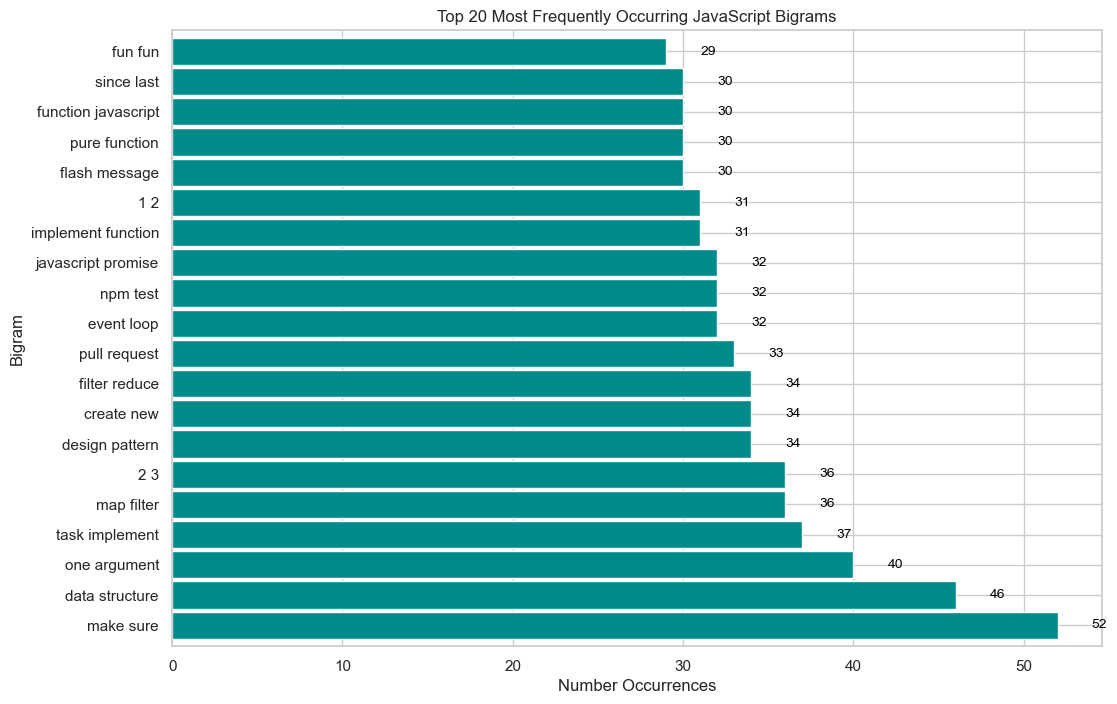

In [57]:
# Sort the bigrams in descending order by frequency
top_20_javascript_bigrams = top_20_javascript_bigrams.sort_values(ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
bars = top_20_javascript_bigrams.plot(kind='barh', color = '#008B8B', width=0.9)

# Add count annotations at the end of the bars
for bar in bars.patches:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height() / 2, 
             f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=10, color='black')

plt.title('Top 20 Most Frequently Occurring JavaScript Bigrams')
plt.xlabel('Number Occurrences')
plt.ylabel('Bigram')

ticks, labels = plt.yticks()
new_labels = [f'{bigram[0]} {bigram[1]}' for bigram in top_20_javascript_bigrams.index]
plt.yticks(ticks, new_labels)

plt.show()

## Q6 JavaScript TRIGRAMS

In [58]:
top_20_javascript_trigrams = (pd.Series(nltk.ngrams(Js_lemmatized, 3))
                      .value_counts()
                      .head(20))

top_20_javascript_trigrams.head()

(map, filter, reduce)          34
(task, implement, function)    29
(fun, fun, function)           28
(higher, order, function)      22
(1, 2, 3)                      21
dtype: int64

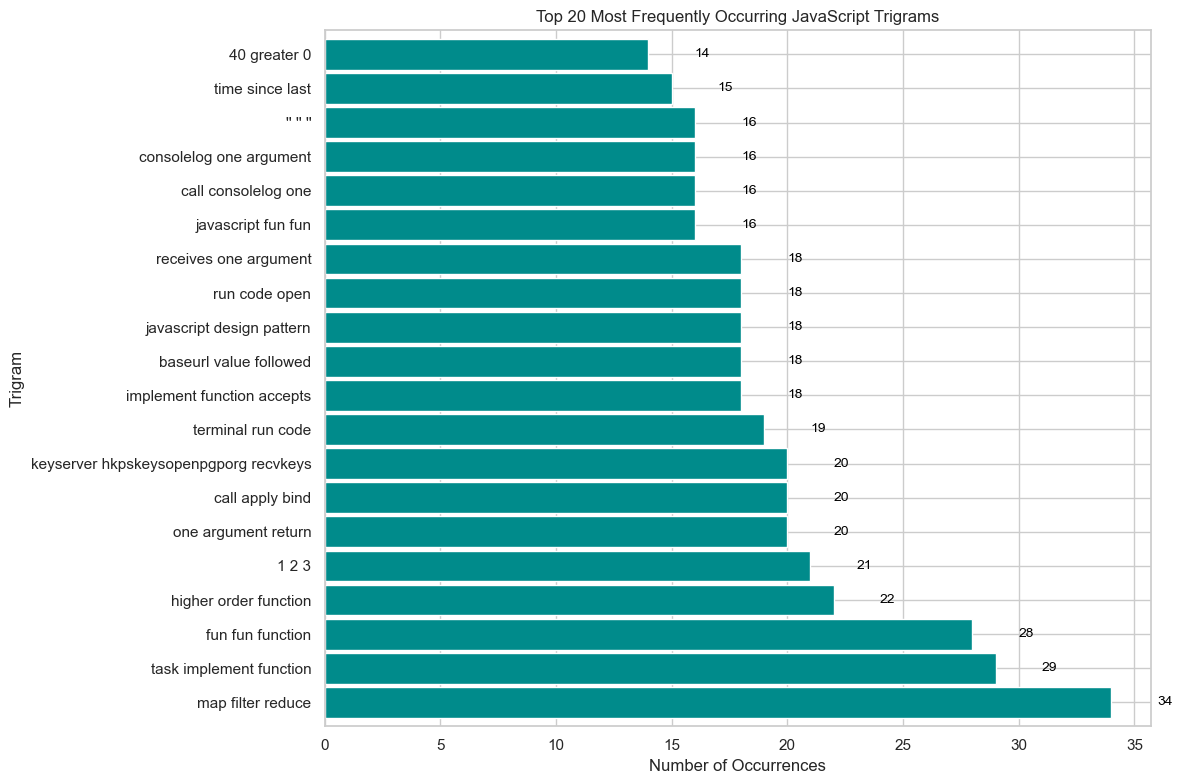

In [59]:
# Sort the bigrams in descending order by frequency
top_20_javascript_trigrams = top_20_javascript_trigrams.sort_values(ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
bars = top_20_javascript_trigrams.plot(kind='barh', color='#008B8B', width=0.9)

# Add count annotations at the end of the bars
for bar in bars.patches:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height() / 2, 
             f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=10, color='black')

plt.title('Top 20 Most Frequently Occurring JavaScript Trigrams')
plt.xlabel('Number of Occurrences')
plt.ylabel('Trigram')

ticks, labels = plt.yticks()
new_labels = [f'{trigram[0]} {trigram[1]} {trigram[2]}' for trigram in top_20_javascript_trigrams.index]
plt.yticks(ticks, new_labels)

plt.tight_layout()
plt.show()


# ___________________________________________________________________

MODELING STARTED

## BAG OF WORDS 

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Combine word frequency DataFrames for Python and JavaScript
py_original_words = Py_words_original.index
js_original_words = Js_words_original.index

py_cleaned_words = Py_words_cleaned.index
js_cleaned_words = Js_words_cleaned.index

py_lemmatized_words = Py_words_lemmatized.index
js_lemmatized_words = Js_words_lemmatized.index

# Create a single DataFrame for Python and JavaScript word frequencies
py_word_freq_df = pd.DataFrame({'word': py_original_words, 'frequency': Py_words_original.values})
js_word_freq_df = pd.DataFrame({'word': js_original_words, 'frequency': Js_words_original.values})

# Create a CountVectorizer for Python and JavaScript
py_vectorizer = CountVectorizer(vocabulary=py_original_words)
js_vectorizer = CountVectorizer(vocabulary=js_original_words)

# Transform the word frequencies into Bag of Words representations
py_bow = py_vectorizer.transform(py_original_words).toarray()
js_bow = js_vectorizer.transform(js_original_words).toarray()

# Convert Bag of Words arrays to DataFrames
py_bow_df = pd.DataFrame(py_bow, columns=py_original_words)
js_bow_df = pd.DataFrame(js_bow, columns=js_original_words)

In [61]:
# Display the Bag of Words DataFrames for Python and JavaScript
print("Bag of Words DataFrame for Python:")
py_bow_df.head().T

Bag of Words DataFrame for Python:


,0,1,2,3,4
and,1,0,0,0,0
-,0,0,0,0,0
for,0,0,1,0,0
to,0,0,0,1,0
the,0,0,0,0,1
...,...,...,...,...,...
2.You,0,0,0,0,0
follows:from,0,0,0,0,0
kerasRelease,0,0,0,0,0
compatibilityKeras,0,0,0,0,0


In [62]:
py_feature_names = py_vectorizer.get_feature_names_out()
js_feature_names = js_vectorizer.get_feature_names_out()

In [63]:
print("Feature names for Python:")
py_feature_names

Feature names for Python:


array(['and', '-', 'for', ..., 'kerasRelease', 'compatibilityKeras',
       'https://discord.gg/pallets'], dtype=object)

In [64]:
print("\nFeature names for JavaScript:")
js_feature_names


Feature names for JavaScript:


array(['the', 'to', 'and', ..., '(21.0)', 'optionsNIGHT_MODE',
       '等）。省级数据预览codename13河北省14山西省15内蒙古自治区45广西壮族自治区地级数据预览codenameprovinceCode1301石家庄市131401太原市141525锡林郭勒盟154503桂林市45县级数据预览codenamecityCodeprovinceCode130111栾城区130113140121清徐县140114152527太仆寺旗152515450305七星区450345乡级数据预览codenameareaCodecityCodeprovinceCode130111200南高乡130111130113140121102东于镇140121140114152527201贡宝拉格苏木152527152515450305004漓东街道办事处450305450345村级数据预览codenamestreetCodeareaCodecityCodeprovinceCode130111200201南高村委会130111200130111130113140121102001东于社区居委会140121102140121140114152527201206敦达乌苏嘎查152527201152527152515450305004006横塘社区450305004450305450345'],
      dtype=object)

## TF-IDF

### Hypothesis 2 - Term Frequency-Inverse Document Frequency (TF-IDF) analysis to use scoresfor words across the repository texts, in order to identify the most significant and frequent words. Selecting the top five words based on their TF-IDF scores.

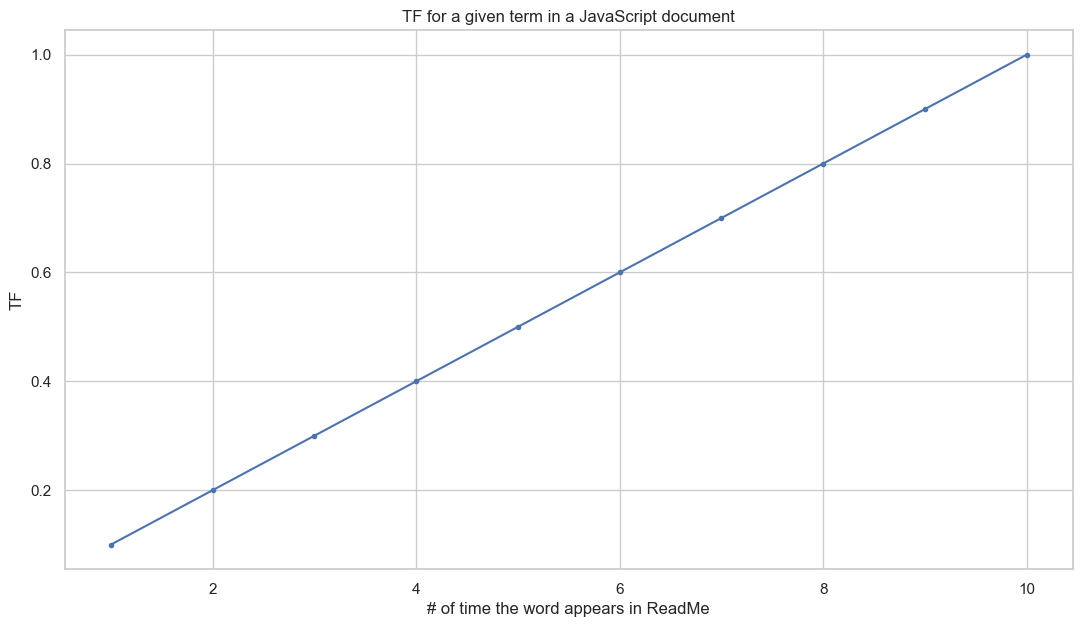

In [67]:
import matplotlib.pyplot as plt
import numpy as np

Js_words_lemmatized = 10

x_js = np.arange(1, Js_words_lemmatized + 1)
y_js = x_js / Js_words_lemmatized

plt.plot(x_js, y_js, marker='.')

plt.xlabel('# of time the word appears in ReadMe')
plt.ylabel('TF')
plt.title('TF for a given term in a JavaScript document')

plt.show()


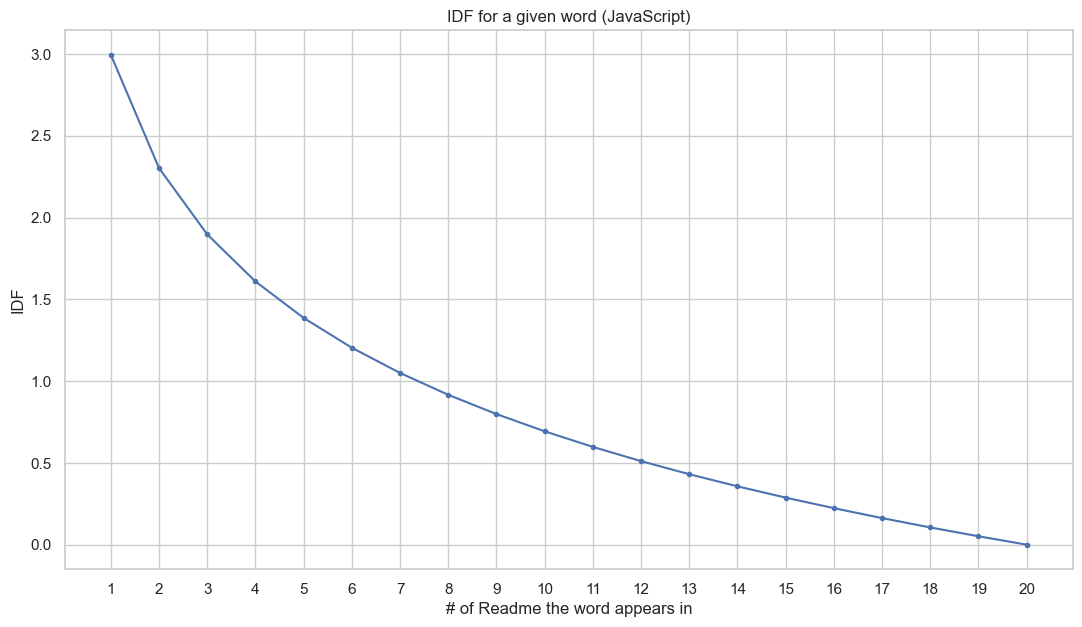

In [68]:
Js_words_lemmatized = 20

x = np.arange(1, Js_words_lemmatized + 1)
y = np.log(Js_words_lemmatized / x)

plt.plot(x, y, marker='.')

plt.xticks(x)
plt.xlabel('# of Readme the word appears in')
plt.ylabel('IDF')
plt.title('IDF for a given word (JavaScript)')

plt.show()


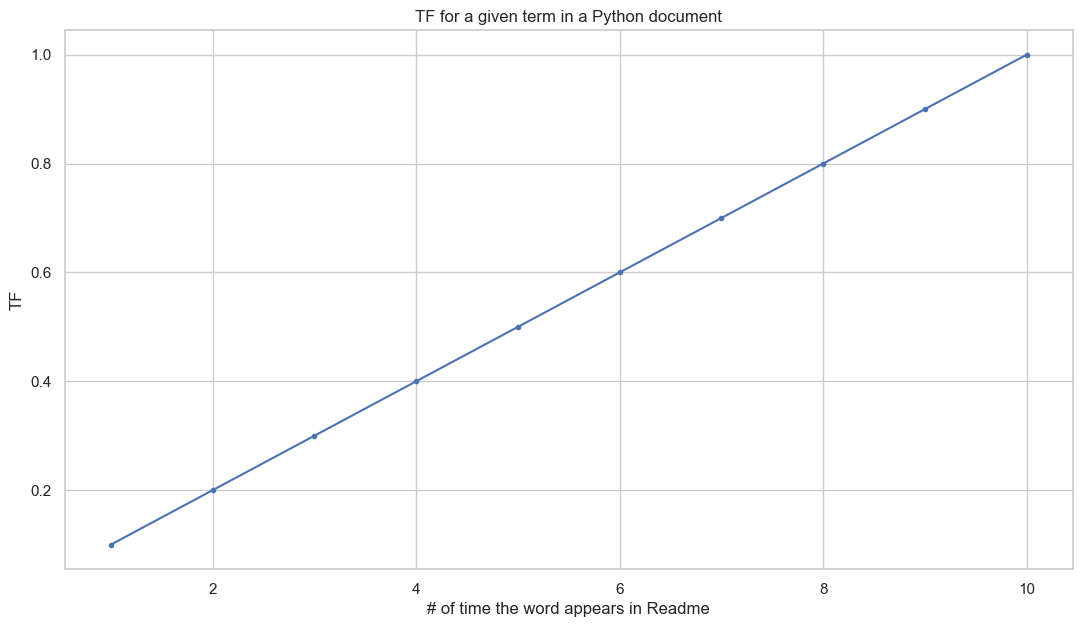

In [69]:
import matplotlib.pyplot as plt
import numpy as np

n_words = 10

x_py = np.arange(1, n_words + 1)
y_py = x_py / n_words

plt.plot(x_py, y_py, marker='.')

plt.xlabel('# of time the word appears in Readme')
plt.ylabel('TF')
plt.title('TF for a given term in a Python document')

plt.show()


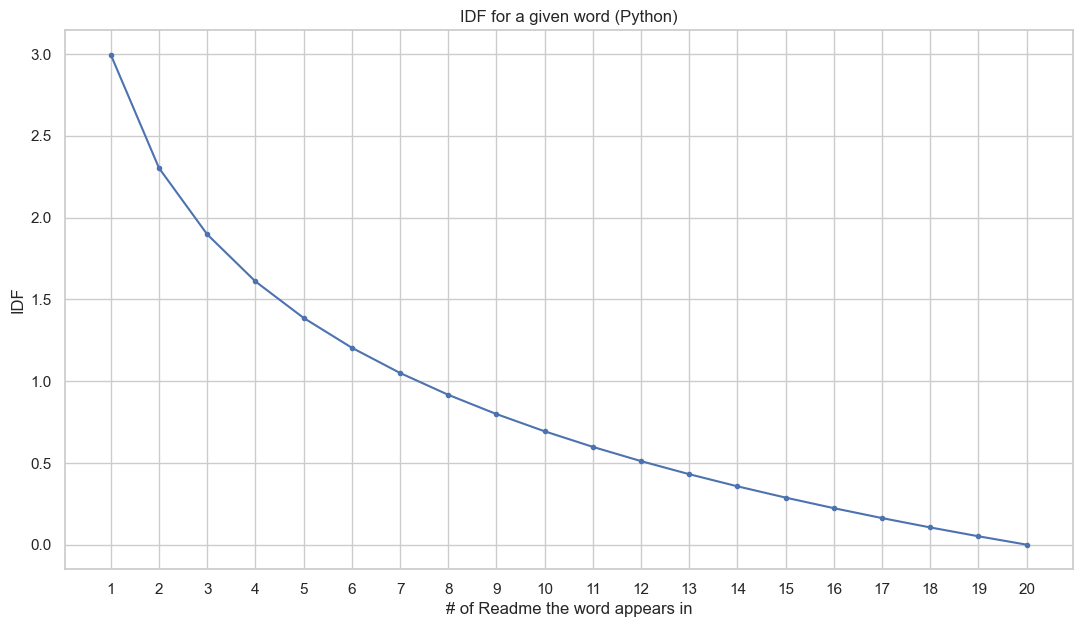

In [70]:
Py_words_lemmatized = 20

x = np.arange(1, Py_words_lemmatized + 1)
y = np.log(Py_words_lemmatized / x)

plt.plot(x, y, marker='.')

plt.xticks(x)
plt.xlabel('# of Readme the word appears in')
plt.ylabel('IDF')
plt.title('IDF for a given word (Python)')

plt.show()


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizers for Python and JavaScript
py_tfidf_vectorizer = TfidfVectorizer()
js_tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data using TF-IDF vectorizers
py_tfidf_matrix = py_tfidf_vectorizer.fit_transform(language_df[language_df['language'] == 'Python']['lemmatized'])
js_tfidf_matrix = js_tfidf_vectorizer.fit_transform(language_df[language_df['language'] == 'JavaScript']['lemmatized'])

# Print the vocabulary (word-to-index mapping) for Python and JavaScript TF-IDF representations
print("Vocabulary for Python TF-IDF:")
print(py_tfidf_vectorizer.vocabulary_)

print("\nVocabulary for JavaScript TF-IDF:")
print(js_tfidf_vectorizer.vocabulary_)


Vocabulary for Python TF-IDF:
{'public': 10210, 'apis': 954, 'collective': 2413, 'list': 7709, 'free': 5155, 'use': 13386, 'software': 11912, 'web': 13818, 'development': 3726, 'status': 12189, 'project': 10111, 'contributing': 2683, 'guide': 5684, 'api': 836, 'issue': 6768, 'pull': 10220, 'request': 10885, 'license': 7601, 'alternative': 658, 'site': 11836, 'unofficials': 13315, 'dev': 3703, 'resource': 10952, 'apihouse': 891, 'become': 1457, 'sponsor': 12069, 'support': 12374, 'maintainer': 7939, 'special': 12023, 'thanks': 12754, 'fastest': 4784, 'way': 13796, 'integrate': 6599, 'product': 10050, 'explore': 4644, 'discover': 3842, 'consume': 2649, 'simpler': 11807, 'programmable': 10082, 'building': 1798, 'block': 1593, 'one': 9140, 'platform': 9726, '10x': 52, 'developer': 3709, 'experience': 4618, 'indexanimalsanimeantimalwareart': 6380, 'designauthentication': 3663, 'authorizationblockchainbooksbusinesscalendarcloud': 1256, 'storage': 12219, 'file': 4861, 'sharingcontinuous': 116

In [74]:
print("\nBag of Words DataFrame for JavaScript:")
js_bow_df.head()


Bag of Words DataFrame for JavaScript:


,the,to,and,a,in,of,is,—,you,for,...,served,REST.Predefined,(optional)TIME_FORMAT,(12)-,24DAY_START,(7.0),optionsDAY_END,(21.0),optionsNIGHT_MODE,等）。省级数据预览codename13河北省14山西省15内蒙古自治区45广西壮族自治区地级数据预览codenameprovinceCode1301石家庄市131401太原市141525锡林郭勒盟154503桂林市45县级数据预览codenamecityCodeprovinceCode130111栾城区130113140121清徐县140114152527太仆寺旗152515450305七星区450345乡级数据预览codenameareaCodecityCodeprovinceCode130111200南高乡130111130113140121102东于镇140121140114152527201贡宝拉格苏木152527152515450305004漓东街道办事处450305450345村级数据预览codenamestreetCodeareaCodecityCodeprovinceCode130111200201南高村委会130111200130111130113140121102001东于社区居委会140121102140121140114152527201206敦达乌苏嘎查152527201152527152515450305004006横塘社区450305004450305450345
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## MODELING LEMMATIZED

In [81]:
# Load and preprocess data (replace with your own preprocessing steps)
data = language_df


# Create feature vectors
tf_vectorizer = CountVectorizer(max_features=1000)  # You can adjust max_features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features

X_tf = tf_vectorizer.fit_transform(data['lemmatized']).toarray()
X_tfidf = tfidf_vectorizer.fit_transform(data['lemmatized']).toarray()
y = data['language']

# Split the data
X_train_tf, X_test_tf, y_train, y_test = train_test_split(X_tf, y, test_size=0.2, random_state=123)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=123)

# Build and train models
model_tf = LogisticRegression()
model_tfidf = LogisticRegression()

model_tf.fit(X_train_tf, y_train)
model_tfidf.fit(X_train_tfidf, y_train)

# Evaluate performance
y_pred_tf = model_tf.predict(X_test_tf)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

accuracy_tf = accuracy_score(y_test, y_pred_tf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

print("TF Model Accuracy:", accuracy_tf)
print("TF-IDF Model Accuracy:", accuracy_tfidf)

print("TF Model Classification Report:")
print(classification_report(y_test, y_pred_tf))

print("TF-IDF Model Classification Report:")
print(classification_report(y_test, y_pred_tfidf))

TF Model Accuracy: 0.9722222222222222
TF-IDF Model Accuracy: 0.9444444444444444
TF Model Classification Report:
              precision    recall  f1-score   support

  JavaScript       0.96      1.00      0.98        23
      Python       1.00      0.92      0.96        13

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

TF-IDF Model Classification Report:
              precision    recall  f1-score   support

  JavaScript       0.92      1.00      0.96        23
      Python       1.00      0.85      0.92        13

    accuracy                           0.94        36
   macro avg       0.96      0.92      0.94        36
weighted avg       0.95      0.94      0.94        36



### <Span style= 'color: #800020'>SCALING PERFORMED

In [103]:
to_scale = ['original', 'clean', 'lemmatized']

In [106]:

#CodeUp visualize scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,QuantileTransformer

def visualize_scaler(scaler, df, features_to_scale, bins=50):
    features_to_scale = ['original', 'clean', 'lemmatized']
    #create subplot structure
    fig, axs = plt.subplots(len(features_to_scale), 2, figsize=(24, 24,))
    #copy the df for scaling
    df_scaled = df.copy()
    
    #fit and transform the df
    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

    #plot the pre-scaled data next to the post-scaled data in one row of a subplot
    for (ax1, ax2), feature in zip(axs, features_to_scale):
        ax1.hist(df[feature], bins=bins, color='#E97451')
        ax1.set(title=f'{feature} before scaling', xlabel=feature, ylabel='count',)
    
        ax2.hist(df[feature], bins=bins, color='#E97451')
        ax2.set(title=f'{feature} after scaling with {scaler.__class__.__name__}', xlabel=feature, ylabel='count')
    plt.tight_layout()

KeyError: "['clean'] not in index"

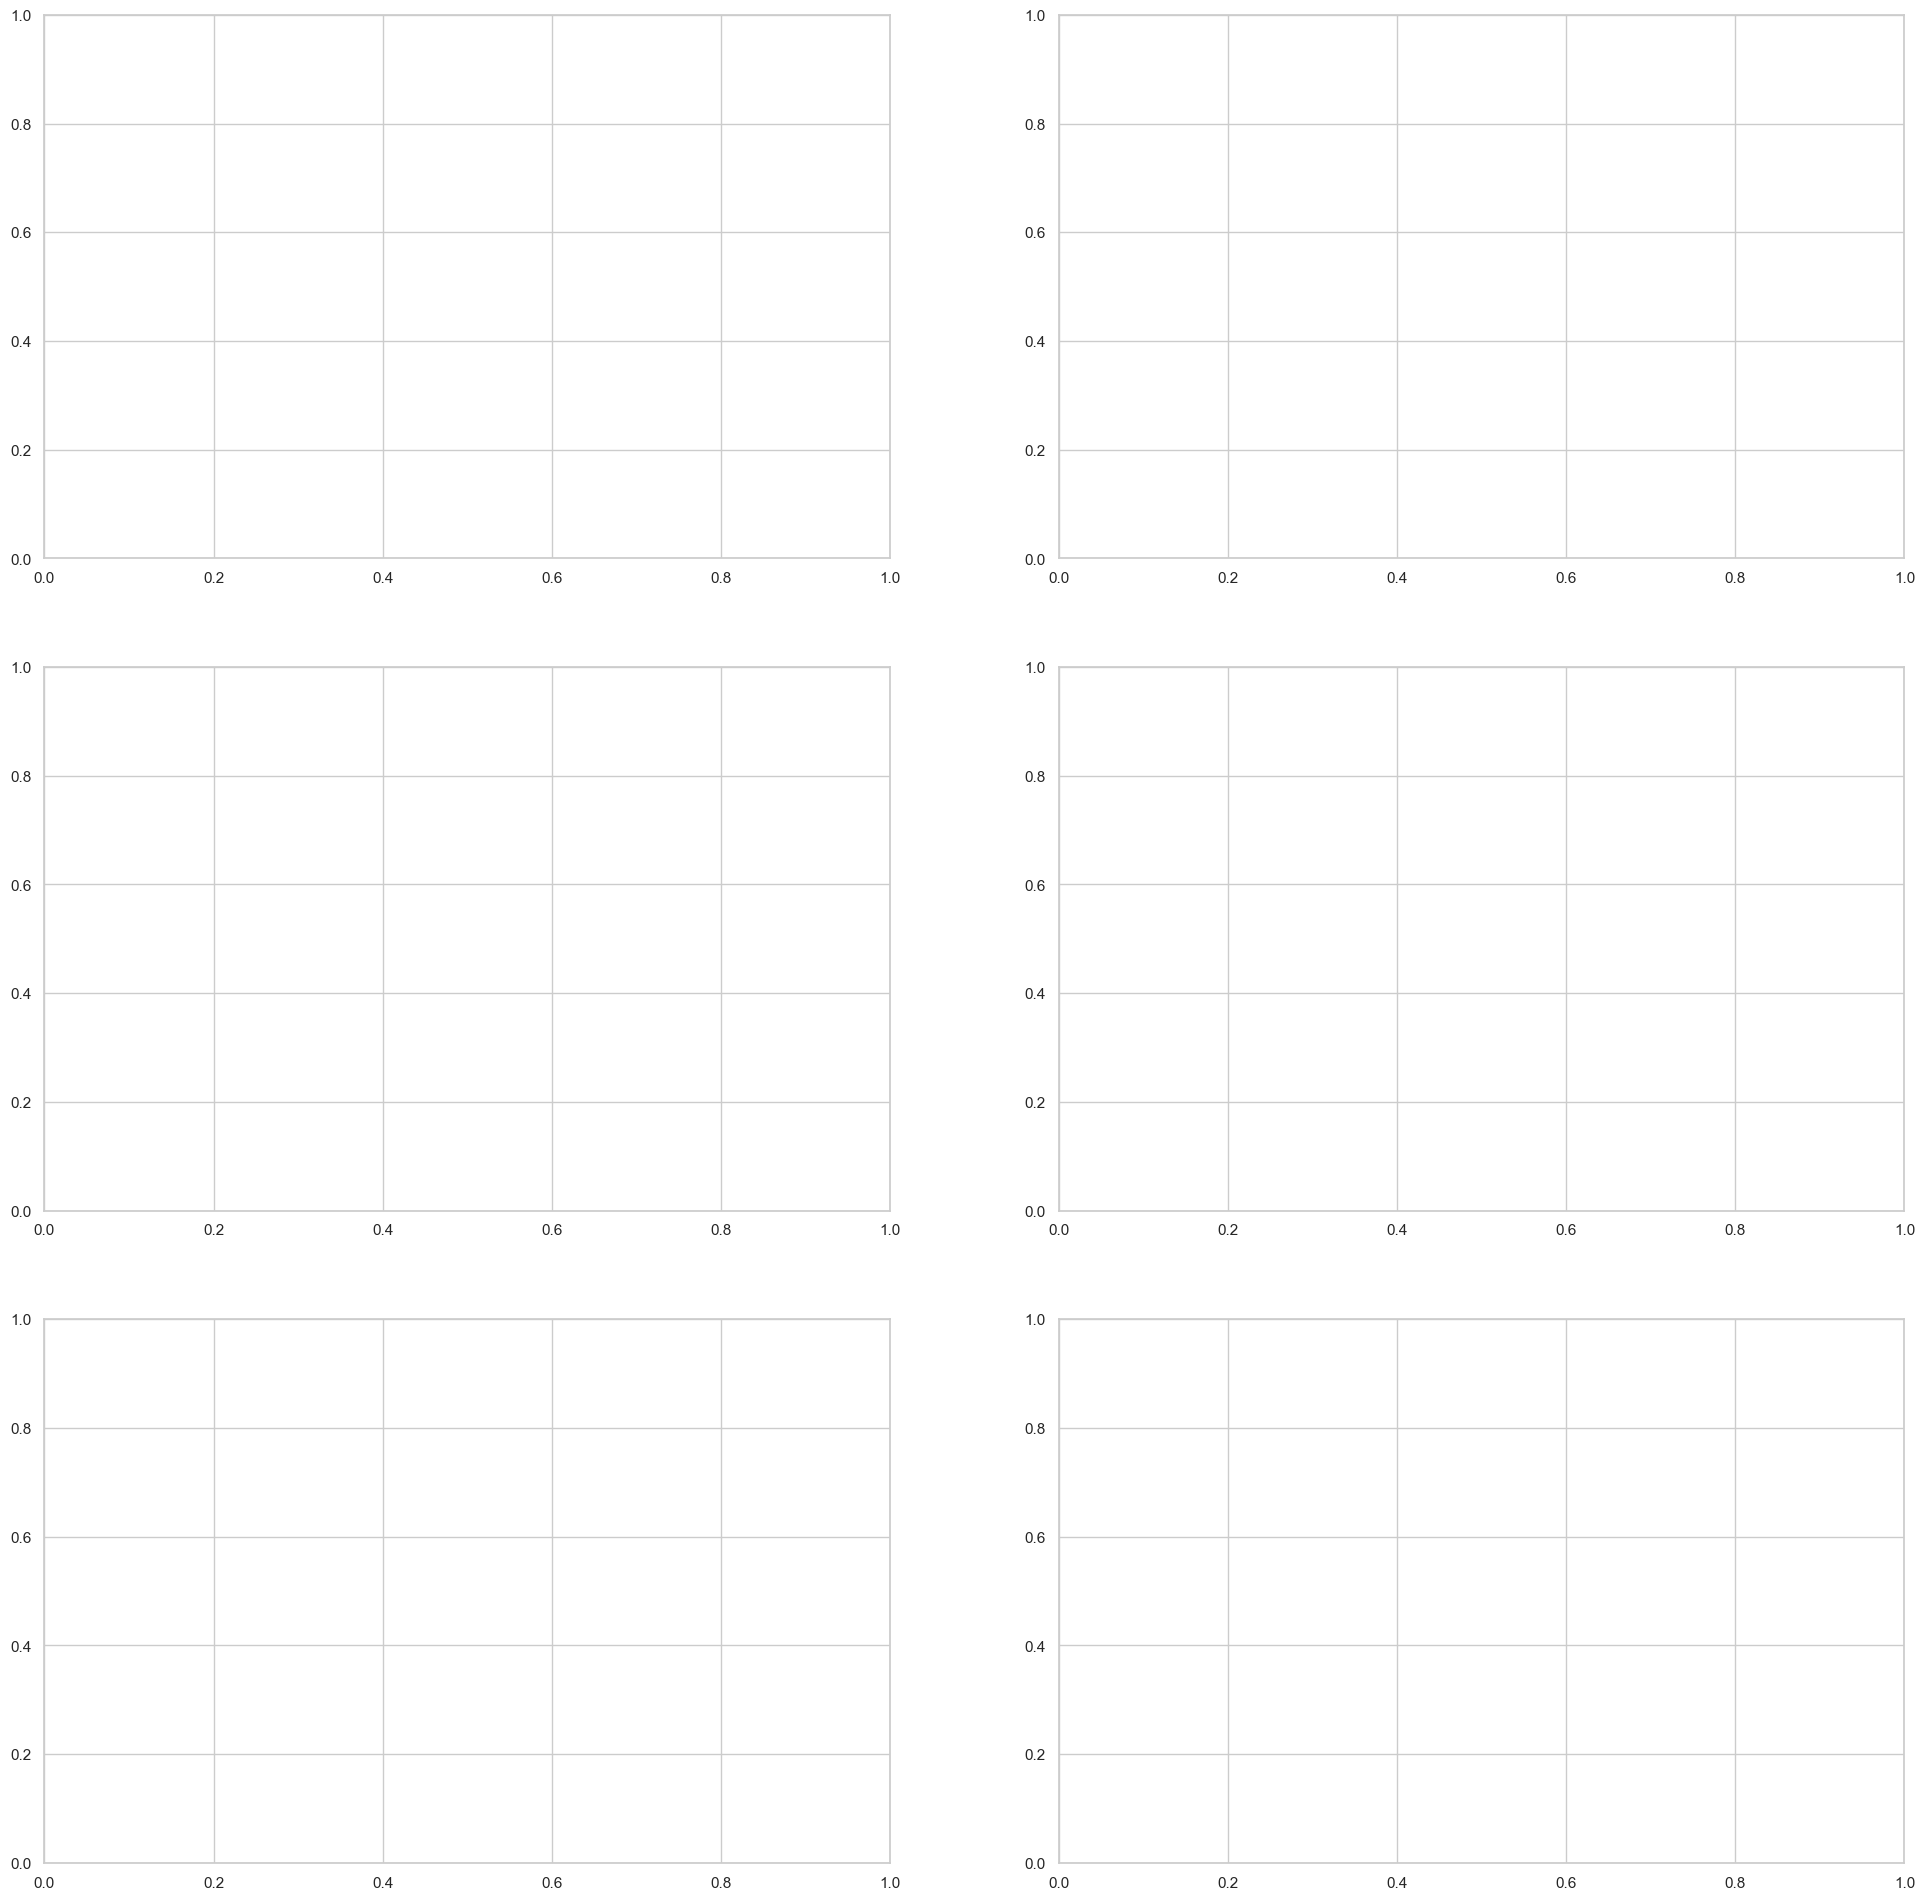

In [105]:
# call function with minmax
mm_scaler = MinMaxScaler()
visualize_scaler(scaler=mm_scaler, df=language_df, features_to_scale=to_scale, bins=50)

In [98]:
# call function with standardscaler
standard_scaler = StandardScaler()
visualize_scaler(scaler=standard_scaler, df=wine_train, features_to_scale=to_scale, bins=50)

NameError: name 'wine_train' is not defined

<Span style= 'color: #800020'>Hypothesis 1 - Chi-squared test of independence to determine if the distribution of programming languages (JavaScript, Python) significantly differs within the READMEs.

- alpha = .05
- H0 = Is language indepen
- Ha = Chlorides is correlated with wine quality
- Outcome: We reject or accept the Null Hypothesis.

In [ ]:
# call function with robustscaler
r_scaler = RobustScaler()
visualize_scaler(scaler=r_scaler, df=wine_train, features_to_scale=to_scale, bins=50)

## <Span style= 'color: #800020'> Regression Modeling

In [ ]:
def x_y_split(wine_train, wine_validate, wine_test):
    X_train, y_train = wine_train.drop(columns=['quality']), wine_train.quality
    X_validate, y_validate = wine_validate.drop(columns=['quality']), wine_validate.quality
    X_test, y_test = wine_test.drop(columns=['quality']), wine_test.quality
    return X_train, y_train, X_validate, y_validate, X_test, y_test 

In [ ]:
X_train, y_train, X_validate, y_validate, X_test, y_test = x_y_split(wine_train, wine_validate, wine_test)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
print(f"""Train shape: {X_train.shape}
Validate shape: {X_validate.shape}
Test shape: {X_test.shape}
""")

In [ ]:
def wine_distplot():
    plt.hist(y_train.quality, color= 'brown')
    plt.title("Distribution of Target (Wine Quality)")
    plt.xlabel("Final algorithm distribution (Wine")
    plt.ylabel("Number of Features")
    plt.show()

The assumption of a normal distribution for the target variable, 'Wine Quality' makes it suitable for continuous target variables with a power of 0.

#### BASELINE 

In [ ]:
y_train.mean()

In [ ]:
y_train.median()

In [ ]:
def baseline(y_train, y_validate):
    #  y_train and y_validate to be dataframes to append the new metric columns with predicted values. 
    y_train = pd.DataFrame(y_train)
    y_validate = pd.DataFrame(y_validate)

    # Baseline for mean 
    # 1. Predict quality_pred_mean  make columns for train and validate
    quality_pred_mean = y_train.quality.mean()
    y_train['quality_pred_mean'] = quality_pred_mean
    y_validate['quality_pred_mean'] = quality_pred_mean 

  # 3. RMSE of quality_pred_mean
    rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_mean) ** (.5)
    rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_mean) ** (.5)

    # create a df to easily view results of models
    metric_df = pd.DataFrame(data = [
        {
            'model': "mean_baseline",
            'RMSE_train': rmse_train,
            'RMSE_validate': rmse_validate,
            "R2_validate": explained_variance_score(y_validate.quality, y_validate.quality_pred_mean)
        }
    ])

    return y_train, y_validate, metric_df

In [ ]:
y_train, y_validate, metric_df = baseline(y_train, y_validate)

In [ ]:
y_train.head()

In [ ]:
metric_df

In [ ]:
# plot to visualize actual vs predicted. 
def act_vs_pred():
    plt.hist(y_train.quality, color='brown', alpha=.5, label="Actual Wine Quality")
    plt.hist(y_train.quality_pred_mean, bins=1, color='red', alpha=.5,  label="Predicted Wine Quality - Mean")
    #plt.hist(y_train.quality_pred_median, bins=1, color='orange', alpha=.5, label="Predicted Wine Quality - Median")
    plt.xlabel("Final Wine Quality Score (quality)")
    plt.ylabel("Number of Observations")
    plt.legend()
    plt.show()

In [ ]:
act_vs_pred()

In [ ]:
def ols_lasso_tweedie_poly(X_train, X_validate, y_train, y_validate, metric_df):
    ''' This function runs OLS, Lasso and Tweedie Regression models at once'''
    #---OLS------
    # make and fit OLS model
    lm = LinearRegression()

    OLSmodel = lm.fit(X_train, y_train.quality)

    # make a prediction and save it to the y_train
    y_train['quality_pred_ols'] = lm.predict(X_train)

    #evaluate RMSE
    rmse_train_ols = mean_squared_error(y_train.quality, y_train.quality_pred_ols) ** .5

    # predict validate
    y_validate['quality_pred_ols'] = lm.predict(X_validate)

    # evaluate RMSE for validate
    rmse_validate_ols = mean_squared_error(y_validate.quality, y_validate.quality_pred_ols) ** .5

    #append metric
    metric_df = metric_df.append({
        'model': 'ols',
        'RMSE_train': rmse_train_ols,
        'RMSE_validate': rmse_validate_ols,
        'R2_validate': explained_variance_score(y_validate.quality, y_validate.quality_pred_ols)    
    }, ignore_index=True)

    print(f"""RMSE for OLS using LinearRegression
        Training/In-Sample:  {rmse_train_ols:.2f} 
        Validation/Out-of-Sample: {rmse_validate_ols:.2f}\n""")


    #------LassoLars----------
    # make and fit Lasso+Lars model
    lars = LassoLars(alpha=0.01)

    Larsmodel = lars.fit(X_train, y_train.quality)

    # make a prediction and save it to the y_train
    y_train['quality_pred_lars'] = lars.predict(X_train)

    #evaluate RMSE
    rmse_train_lars = mean_squared_error(y_train.quality, y_train.quality_pred_lars) ** .5

    # predict validate
    y_validate['quality_pred_lars'] = lars.predict(X_validate)

    # evaluate RMSE for validate
    rmse_validate_lars = mean_squared_error(y_validate.quality, y_validate.quality_pred_lars) ** .5

    #append metric
    metric_df = metric_df.append({
        'model': 'lasso_alpha0.01',
        'RMSE_train': rmse_train_lars,
        'RMSE_validate': rmse_validate_lars,
        'R2_validate': explained_variance_score(y_validate.quality, y_validate.quality_pred_lars)    
    }, ignore_index=True)

    print(f"""RMSE for LassoLars
        Training/In-Sample:  {rmse_train_lars:.2f} 
        Validation/Out-of-Sample: {rmse_validate_lars:.2f}\n""")

    #-----------Tweedie Model--------
    # make and fit Tweedie model
    tr = TweedieRegressor(power=0, alpha=1.0)

    Tweediemodel = tr.fit(X_train, y_train.quality)

    # make a prediction and save it to the y_train
    y_train['quality_pred_tweedie'] = tr.predict(X_train)

    #evaluate RMSE
    rmse_train_tweedie = mean_squared_error(y_train.quality, y_train.quality_pred_tweedie) ** .5

    # predict validate
    y_validate['quality_pred_tweedie'] = tr.predict(X_validate)

    # evaluate RMSE for validate
    rmse_validate_tweedie = mean_squared_error(y_validate.quality, y_validate.quality_pred_tweedie) ** .5

    # append metric
    metric_df = metric_df.append({
        'model': 'tweedie_power0_alpha1.0',
        'RMSE_train': rmse_train_tweedie,
        'RMSE_validate': rmse_validate_tweedie,
        'R2_validate': explained_variance_score(y_validate.quality, y_validate.quality_pred_tweedie)    
    }, ignore_index=True)

    print(f"""RMSE for TweedieRegressor
        Training/In-Sample:  {rmse_train_tweedie:.2f} 
        Validation/Out-of-Sample: {rmse_validate_tweedie:.2f}\n""")
    
    #----------Polynomial--------------
    #1. Create the polynomial features to get a new set of features
    pf = PolynomialFeatures(degree=2) #Quadratic aka x-squared
    
    #2. Fit and transform X_train_scaled
    X_train_degree2 = pf.fit_transform(X_train)
    
    #3. Transform X_validate_scaled & X_test_scaled 
    X_validate_degree2 = pf.transform(X_validate)
    X_test_degree2 = pf.transform(X_test)
    
    
    #2.1 MAKE THE THING: create the model object
    poly = LinearRegression()
    
    #2.2 FIT THE THING: fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    poly.fit(X_train_degree2, y_train.quality)
    
    #3. USE THE THING: predict train
    y_train['quality_pred_poly'] = poly.predict(X_train_degree2)
    
    #4. Evaluate: rmse
    poly_rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_poly) ** .5
    
    #5. REPEAT STEPS 3-4
    
    # predict validate
    y_validate['quality_pred_poly'] = poly.predict(X_validate_degree2)
    
    # evaluate: rmse
    poly_rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_poly) ** .5
    
    print(f"""RMSE for Polynomial Model, degrees=2
    Training/In-Sample:  {poly_rmse_train:.2f}
    Validation/Out-of-Sample:  {poly_rmse_validate:.2f}\n""")
    #Append
    metric_df = metric_df.append({
        "model":"poly_alpha.2",
        "RMSE_train": poly_rmse_train,
        "RMSE_validate": poly_rmse_validate,
        "R2_validate": explained_variance_score(y_validate.quality, y_validate.quality_pred_poly)
    }, ignore_index=True)
    return y_train, y_validate, metric_df

In [ ]:
y_train, y_validate, metric_df = ols_lasso_tweedie_poly(X_train, X_validate, y_train, y_validate, metric_df)

In [ ]:
metric_df

In [ ]:
def lasso_test_model(X_train, y_train, X_test, y_test):
    # Convert y_test Series to a df
    y_test = pd.DataFrame(y_test)
    
    lars = LassoLars(alpha=0.01)
    
    LarsTest = lars.fit(X_test, y_test.quality)
    # USE THE THING: predict on test
    y_test['quality_pred_lars'] = lars.predict(X_test)
    
    # Evaluate: rmse
    rmse_test = mean_squared_error(y_test.quality, y_test.quality_pred_lars) ** (.5)
    
    print(f"""RMSE for LassoLars alpha=0.01
    Out-of-Sample Performance: {rmse_test:.2f}
    Baseline: {y_train.quality.mean():.2f}\n""")
    

In [ ]:
lasso_test_model(X_train, y_train, X_test, y_test)

In [ ]:
def plt_regmods(y_train):
    plt.figure(figsize=(16,8))
    #actual vs mean
    plt.plot(y_validate.quality, y_validate.quality_pred_mean, alpha=.5, color="gray", label='_nolegend_')
    plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
    
    #actual vs. actual
    plt.scatter(y_validate.quality, y_validate.quality, alpha=0.5, cmap="autumn", label='_nolegend_')
    plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)
    
    #actual vs. LinearReg model
    plt.scatter(y_validate.quality, y_validate.quality_pred_ols, 
               alpha=.5, color="red", s=100, label="Model: LinearRegression")
    # #actual vs. LassoLars model
    # plt.scatter(y_validate.quality, y_validate.quality_pred_lars, 
    #             alpha=.5, color="purple", s=100, label="Model: Lasso Lars")
    #actual vs. Tweedie/GenLinModel
    plt.scatter(y_validate.quality, y_validate.quality_pred_tweedie, 
               alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
    # #actual vs. PolynomReg/Quadratic
    # plt.scatter(y_validate.quality, y_validate.quality_pred_poly, 
    #             alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
    plt.legend()
    plt.xlabel("Actual Wine Quality")
    plt.ylabel("Predicted Wine Quality")
    plt.title("Where are predictions more extreme? More modest?")
    plt.show()

In [ ]:
plt_regmods(y_train)

In [ ]:
def hist_mods(y_train):
    # plot to visualize actual vs predicted. 
    plt.figure(figsize=(16,8))
    
    plt.hist(y_validate.quality, color='orange', alpha=.5, label="Actual Wine Quality ")
    # plt.hist(y_validate.quality_pred_ols, color='red', alpha=.5, label="Model: LinearRegression")
    # plt.hist(y_validate.quality_pred_lars, color='purple', alpha=.5, label="Model: Lasso Lars")
    plt.hist(y_validate.quality_pred_tweedie, color='yellow', alpha=.5, label="Model: TweedieRegressor")
    # plt.hist(y_validate.quality_pred_poly, color='green', alpha=.5, label="Model 2nd degree Polynomial")
    
    plt.xlabel("Actual Wine Quality")
    plt.ylabel("Number of Observations")
    plt.title("Comparing the Distribution of Actual Wine Quality to Distributions of Predicted Wine Quality for the Top Models")
    plt.legend()
    plt.show()

In [ ]:
hist_mods(y_train)